In [2]:
import pandas as pd
import scanpy as sc
import anndata as ad
import os
import numpy as np

In [3]:
data_dir = '/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_GSE135337/'
os.chdir(data_dir)

In [45]:
names_list = ["GSM4006648_BC5", "GSM4006644_BC1", "GSM4006647_BC4" ,"GSM4751267_BC6" ,"GSM4751268_BC7"]

GSM4006648_BC5


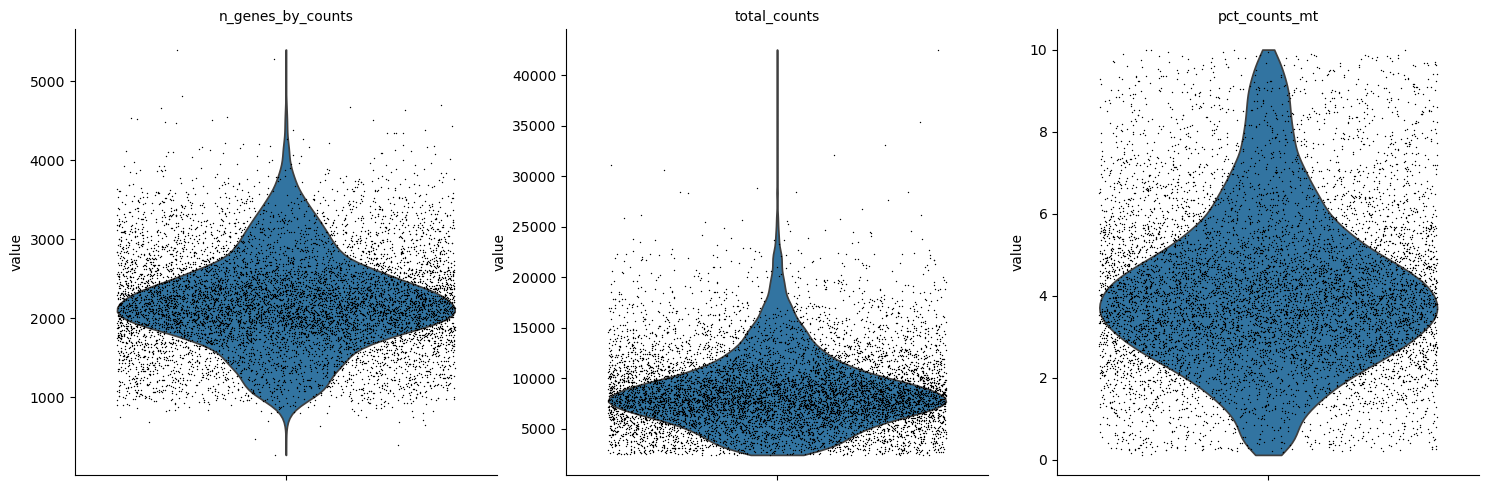

/tmp/ipykernel_14752/1899346785.py:34: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4006644_BC1


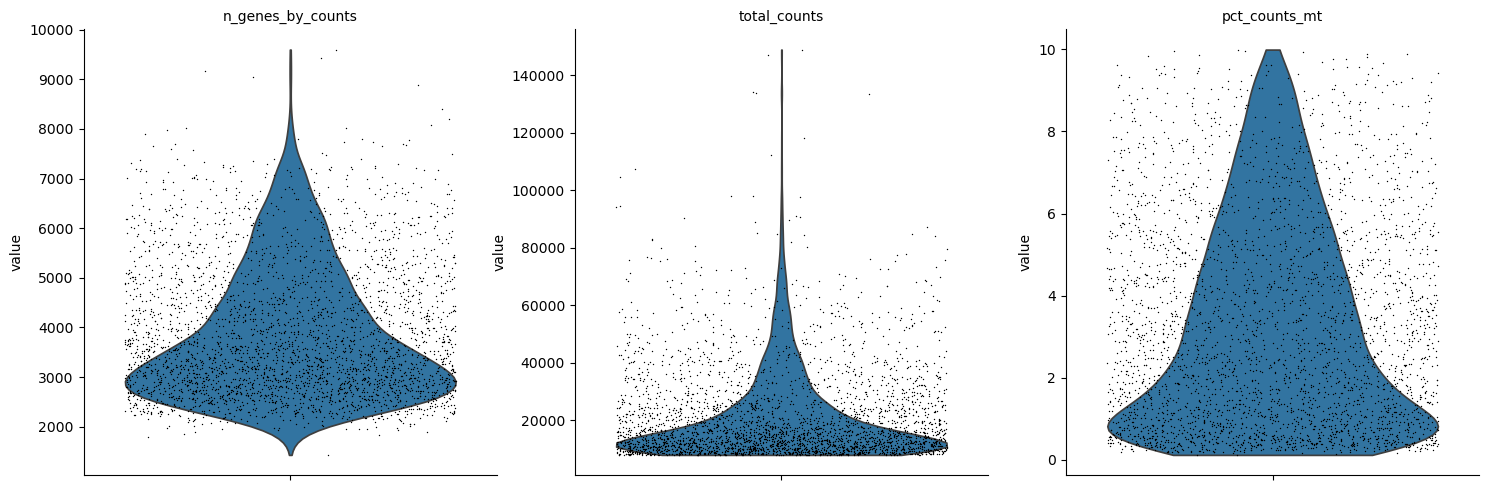

/tmp/ipykernel_14752/1899346785.py:34: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4006647_BC4


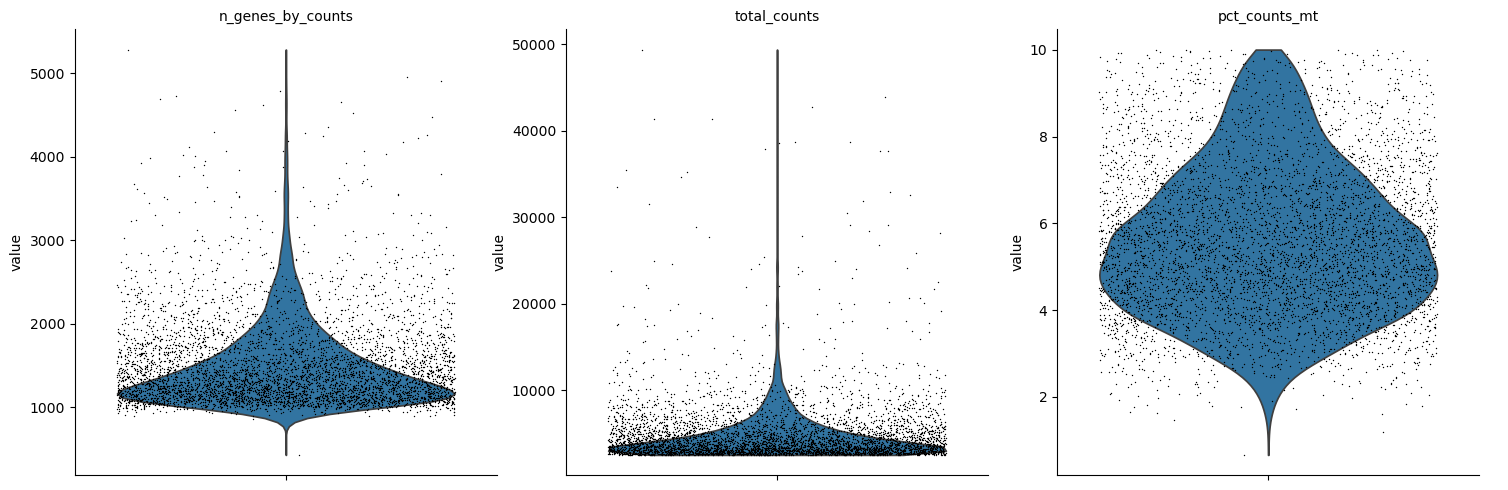

/tmp/ipykernel_14752/1899346785.py:34: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4751267_BC6


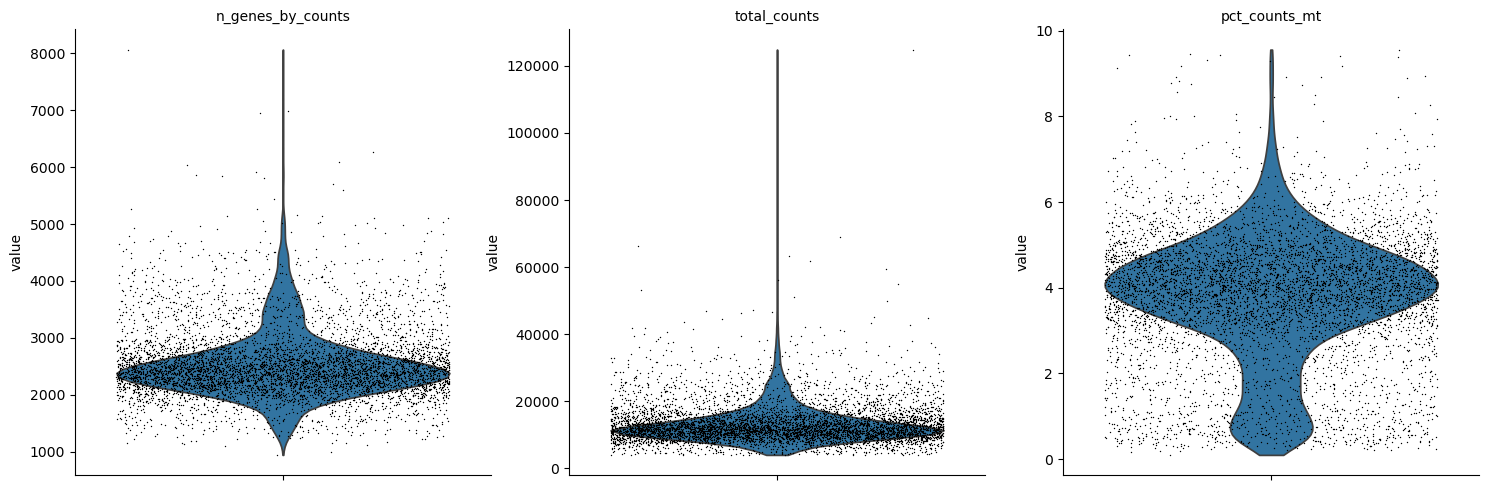

/tmp/ipykernel_14752/1899346785.py:34: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


GSM4751268_BC7


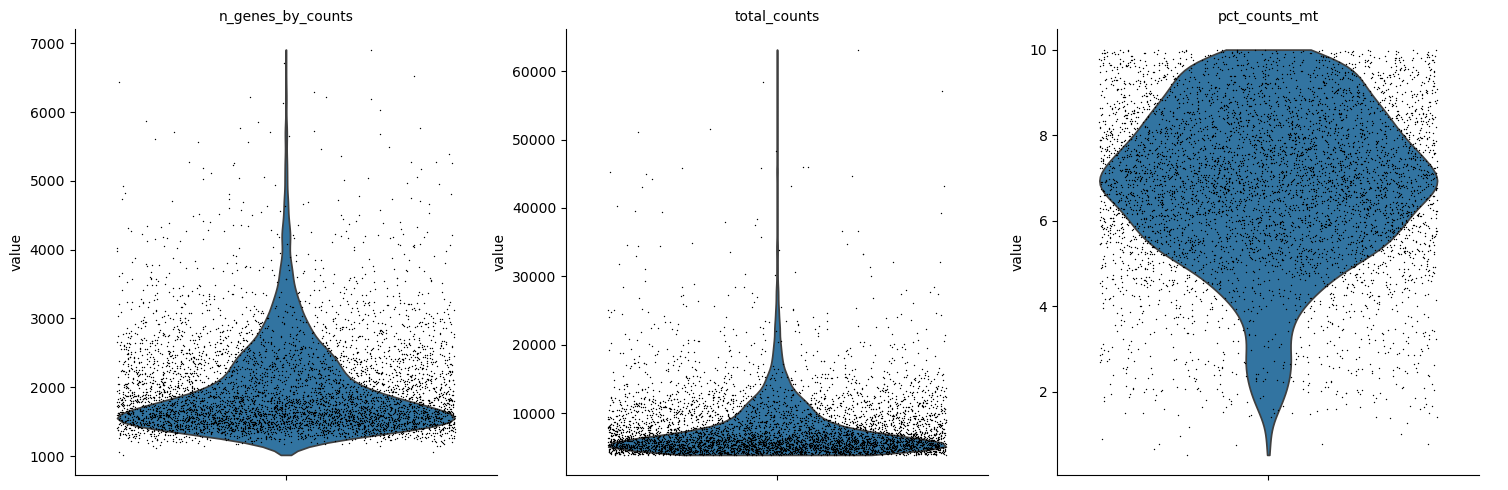

/tmp/ipykernel_14752/1899346785.py:34: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name


In [62]:
adata_list = []

# Loop over each sample and read in the AnnData object
for name in names_list:
    file_path = f"{name}_gene_cell_exprs_table.txt.gz"
    df = pd.read_csv(file_path, sep='\t')
    df.index = df.iloc[:, 0]
    gene_symbols = df.iloc[:,:2]

    # Drop the first two columns (Ensembl ID and gene name)
    df = df.iloc[:, 2:]
    # Transpose so that cells are rows and genes are columns
    df = df.T

    adata = ad.AnnData(df)

    adata.obs['CellID']= df.index
    adata.var[['Ensemble_ID','Gene']]= gene_symbols
    adata.var.index= adata.var['Gene']
    adata.var_names_make_unique() 
    adata.var['mt'] =adata.var_names.str.startswith('MT-')

    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.calculate_qc_metrics(adata,qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    print(name)
    sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True)
    
    adata= adata[adata.obs.n_genes_by_counts <6001, :]

    adata.obs['source'] = name
    adata.layers["counts"] = adata.X.copy()    

    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata,base=2)
    adata.raw = adata  # keep full dimension safe
    adata_list.append(adata)
    

In [47]:
batch_names = [adata.obs['source'].iloc[0] for adata in adata_list]
adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)                                  

/tmp/ipykernel_14752/1379501109.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)


In [10]:
immune= pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/immune_cells_obs.pkl')
immune

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source,_scvi_batch,_scvi_labels,leiden,Status,Stage
ACATACGCATCAGTCA.1-GSM4006644_BC1,ACATACGCATCAGTCA.1,1861,1861,8148,391,4.798724,GSM4006644_BC1,0,0,10,Ta,Ta
ACTATCTAGCCATCGC.1-GSM4006644_BC1,ACTATCTAGCCATCGC.1,3923,3923,16928,546,3.225425,GSM4006644_BC1,0,0,10,Ta,Ta
AGAATAGAGGAATGGA.1-GSM4006644_BC1,AGAATAGAGGAATGGA.1,2476,2476,8285,262,3.162342,GSM4006644_BC1,0,0,9,Ta,Ta
AGCCTAATCTGCTTGC.1-GSM4006644_BC1,AGCCTAATCTGCTTGC.1,3155,3155,13430,230,1.712584,GSM4006644_BC1,0,0,10,Ta,Ta
AGGTCCGGTGCTTCTC.1-GSM4006644_BC1,AGGTCCGGTGCTTCTC.1,2279,2279,8232,117,1.421283,GSM4006644_BC1,0,0,9,Ta,Ta
...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTCAAGTGCATCTA.1-GSM4751268_BC7,TTCTCAAGTGCATCTA.1,1878,1878,6270,423,6.746411,GSM4751268_BC7,4,0,10,Ta,Ta
TTCTTAGTCTTCGGTC.1-GSM4751268_BC7,TTCTTAGTCTTCGGTC.1,1759,1759,5771,45,0.779761,GSM4751268_BC7,4,0,9,Ta,Ta
TTGACTTGTCCAGTTA.1-GSM4751268_BC7,TTGACTTGTCCAGTTA.1,2171,2171,8142,585,7.184967,GSM4751268_BC7,4,0,10,Ta,Ta
TTGTAGGCACATTCGA.1-GSM4751268_BC7,TTGTAGGCACATTCGA.1,2378,2378,9312,377,4.048540,GSM4751268_BC7,4,0,10,Ta,Ta


In [41]:
adata.obs

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source
AAACCTGAGTGCAAGC.1,AAACCTGAGTGCAAGC.1,1679,1679,4924,422,8.570268,GSM4751268_BC7
AAACCTGCACGCTTTC.1,AAACCTGCACGCTTTC.1,1610,1610,6165,331,5.369019,GSM4751268_BC7
AAACCTGGTGCCTGCA.1,AAACCTGGTGCCTGCA.1,2288,2288,10970,737,6.718323,GSM4751268_BC7
AAACCTGTCCCGACTT.1,AAACCTGTCCCGACTT.1,1597,1597,5962,337,5.652466,GSM4751268_BC7
AAACCTGTCGGCGCTA.1,AAACCTGTCGGCGCTA.1,1630,1630,6188,372,6.011635,GSM4751268_BC7
...,...,...,...,...,...,...,...
TTTGTCAGTACAGACG.1,TTTGTCAGTACAGACG.1,1859,1859,6857,475,6.927228,GSM4751268_BC7
TTTGTCAGTCTAGTCA.1,TTTGTCAGTCTAGTCA.1,1420,1420,4543,333,7.329958,GSM4751268_BC7
TTTGTCAGTGGCCCTA.1,TTTGTCAGTGGCCCTA.1,4206,4206,21459,1849,8.616431,GSM4751268_BC7
TTTGTCAGTTCTGGTA.1,TTTGTCAGTTCTGGTA.1,2581,2581,10731,909,8.470786,GSM4751268_BC7


In [35]:
immune.index

Index(['ACATACGCATCAGTCA.1-GSM4006644_BC1',
       'ACTATCTAGCCATCGC.1-GSM4006644_BC1',
       'AGAATAGAGGAATGGA.1-GSM4006644_BC1',
       'AGCCTAATCTGCTTGC.1-GSM4006644_BC1',
       'AGGTCCGGTGCTTCTC.1-GSM4006644_BC1',
       'ATCATGGTCTGCCAGG.1-GSM4006644_BC1',
       'ATGGGAGAGATTACCC.1-GSM4006644_BC1',
       'ATTTCTGAGTAGATGT.1-GSM4006644_BC1',
       'CAACCTCTCGCGATCG.1-GSM4006644_BC1',
       'CAAGAAATCTCCAACC.1-GSM4006644_BC1',
       ...
       'TGCGGGTTCAAGATCC.1-GSM4751268_BC7',
       'TGCGTGGAGACTCGGA.1-GSM4751268_BC7',
       'TGGGAAGAGCTAGTTC.1-GSM4751268_BC7',
       'TGGGCGTCACATTCGA.1-GSM4751268_BC7',
       'TGGTTAGAGTGACATA.1-GSM4751268_BC7',
       'TTCTCAAGTGCATCTA.1-GSM4751268_BC7',
       'TTCTTAGTCTTCGGTC.1-GSM4751268_BC7',
       'TTGACTTGTCCAGTTA.1-GSM4751268_BC7',
       'TTGTAGGCACATTCGA.1-GSM4751268_BC7',
       'TTTCCTCAGGGCACTA.1-GSM4751268_BC7'],
      dtype='object', length=519)

In [48]:
adata_non_immune = adata[~adata.obs.index.isin(immune.index)]

In [49]:
adata_non_immune.obs

,CellID,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,source
AAACCTGAGAGGTAGA.1-GSM4006648_BC5,AAACCTGAGAGGTAGA.1,1954,1954,7144,225,3.149496,GSM4006648_BC5
AAACCTGAGATCTGCT.1-GSM4006648_BC5,AAACCTGAGATCTGCT.1,1682,1682,5412,192,3.547672,GSM4006648_BC5
AAACCTGAGTGCAAGC.1-GSM4006648_BC5,AAACCTGAGTGCAAGC.1,1683,1683,6609,216,3.268271,GSM4006648_BC5
AAACCTGAGTTCGATC.1-GSM4006648_BC5,AAACCTGAGTTCGATC.1,1259,1259,3990,362,9.072682,GSM4006648_BC5
AAACCTGAGTTCGCGC.1-GSM4006648_BC5,AAACCTGAGTTCGCGC.1,1718,1718,5172,131,2.532869,GSM4006648_BC5
...,...,...,...,...,...,...,...
TTTGTCAGTACAGACG.1-GSM4751268_BC7,TTTGTCAGTACAGACG.1,1859,1859,6857,475,6.927228,GSM4751268_BC7
TTTGTCAGTCTAGTCA.1-GSM4751268_BC7,TTTGTCAGTCTAGTCA.1,1420,1420,4543,333,7.329958,GSM4751268_BC7
TTTGTCAGTGGCCCTA.1-GSM4751268_BC7,TTTGTCAGTGGCCCTA.1,4206,4206,21459,1849,8.616431,GSM4751268_BC7
TTTGTCAGTTCTGGTA.1-GSM4751268_BC7,TTTGTCAGTTCTGGTA.1,2581,2581,10731,909,8.470786,GSM4751268_BC7


In [50]:
set(adata_non_immune.obs['source'])

{'GSM4006644_BC1',
 'GSM4006647_BC4',
 'GSM4006648_BC5',
 'GSM4751267_BC6',
 'GSM4751268_BC7'}

In [51]:
t3 = adata_non_immune[adata_non_immune.obs['source']=='GSM4006648_BC5']

In [52]:
t3_df= t3.to_df()

In [53]:
scvi_lfc = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG.xlsx',index_col=0)

In [54]:
scvi_lfc_df= scvi_lfc.iloc[2000:4000][['Gene','lfc_mean']]
scvi_lfc_df

,Gene,lfc_mean
comparison,,
cluster1_T2 vs Rest,S100A8,11.116735
NaN,TCHH,8.430903
NaN,LYNX1,7.749890
NaN,S100A9,7.666663
NaN,SERPINB4,7.538958
...,...,...
NaN,SPOCD1,-6.174197
NaN,TESC,-6.383301
NaN,IGFBP2,-7.289587


In [55]:
scvi_lfc_df.reset_index(inplace=True)
scvi_lfc_df.drop(columns=['comparison'],inplace=True)
scvi_lfc_df.set_index('Gene',inplace=True)
scvi_lfc_df

,lfc_mean
Gene,
S100A8,11.116735
TCHH,8.430903
LYNX1,7.749890
S100A9,7.666663
SERPINB4,7.538958
...,...
SPOCD1,-6.174197
TESC,-6.383301
IGFBP2,-7.289587


In [56]:
blca_lm=t3_df[t3_df.columns.intersection(scvi_lfc_df.index)]
display(blca_lm)

Gene,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CTD-2013N17.7,CISD3,RP11-736N17.10,FO538757.2,AC090498.1,AC133644.2,RASSF1-AS1,RP11-2C24.9,ADORA3,BISPR
AAACCTGAGAGGTAGA.1-GSM4006648_BC5,0,0,0,0,0,0,1,0,0,1,...,0,1,0,2,1,0,0,0,0,0
AAACCTGAGATCTGCT.1-GSM4006648_BC5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGTGCAAGC.1-GSM4006648_BC5,1,1,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGTTCGATC.1-GSM4006648_BC5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
AAACCTGAGTTCGCGC.1-GSM4006648_BC5,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCACCAC.1-GSM4006648_BC5,0,0,0,2,0,0,0,0,0,0,...,0,4,0,1,0,0,0,0,0,0
TTTGTCAGTGTTGAGG.1-GSM4006648_BC5,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,0
TTTGTCAGTTCAGCGC.1-GSM4006648_BC5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
TTTGTCATCAAAGACA.1-GSM4006648_BC5,2,2,0,1,0,0,1,0,0,0,...,0,3,0,1,2,0,0,0,0,0


In [58]:
scvi_lfc_df_int=scvi_lfc_df.loc[blca_lm.columns.intersection(scvi_lfc_df.index)]
scvi_lfc_df_int

,lfc_mean
Gene,
TSPAN6,-0.234558
GCLC,-1.773214
CD99,0.257408
HS3ST1,-1.921947
TMEM176A,0.468119
...,...
AC133644.2,2.427041
RASSF1-AS1,0.665398
RP11-2C24.9,-0.100537


In [59]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [60]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_df_int['lfc_mean'])

display(DPD_df)

,invasiveness
AAACCTGAGAGGTAGA.1-GSM4006648_BC5,-1797.522398
AAACCTGAGATCTGCT.1-GSM4006648_BC5,-958.987254
AAACCTGAGTGCAAGC.1-GSM4006648_BC5,-2075.987098
AAACCTGAGTTCGATC.1-GSM4006648_BC5,-937.313573
AAACCTGAGTTCGCGC.1-GSM4006648_BC5,-615.946779
...,...
TTTGTCAGTGCACCAC.1-GSM4006648_BC5,-1981.918236
TTTGTCAGTGTTGAGG.1-GSM4006648_BC5,-1682.021499
TTTGTCAGTTCAGCGC.1-GSM4006648_BC5,-268.836477
TTTGTCATCAAAGACA.1-GSM4006648_BC5,-960.612658


array([[<Axes: title={'center': 'invasiveness'}>]], dtype=object)

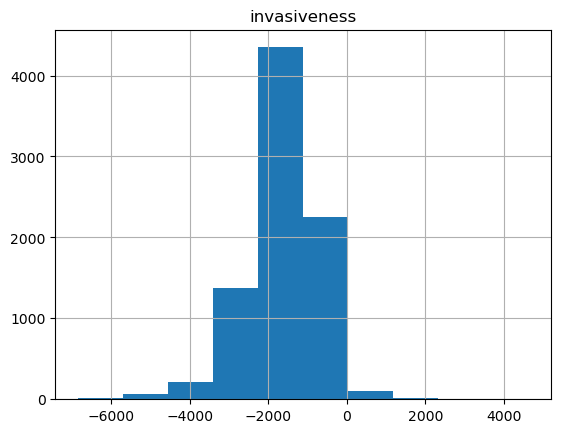

In [61]:
DPD_df.hist()